# <font color ='Peachpuff'> <font face ='Century'> **Calculation Software**

### <font color ='Peachpuff'> <font face ='Century'> User Data:

In [1]:
import pandas as pd
import numpy as np
import sympy as sp 
import math
import matplotlib.pyplot as plt

In [252]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6djMLw_jWx6UKf8lMlkLOpvf1UFSNx9IcNcuU7AFJ9CT56yUQ9q0077nDEZwa5vByYMbcZSL9O1zH/pub?gid=0&single=true&output=csv')

In [253]:
df.head()

,Username,Password,Email,City
0,user1,646718,user1@example.com,CiudadA
1,user2,982432,user2@example.com,CiudadB
2,user3,954877,user3@example.com,CiudadC
3,user4,404277,user4@example.com,CiudadA
4,user5,215794,user5@example.com,CiudadD


In [254]:
df.shape

(110, 4)

In [255]:
len(df)

110

### <font color ='Peachpuff'> <font face ='Century'> User Interface:

In [256]:
History = pd.DataFrame(columns=['User_Logged_In'])

In [259]:
def Inicio_Sesion():
    
    global History 
    user = input('Username: ')
    passw = int(input('Password: '))

    while True:
        x = df[(df['Username'] == user) & (df['Password'] == passw)] 
        
        if not x.empty:
            print('Inicio de sesión exitoso. Bienvenido', user)
            History = History.append({'User_Logged_In' : user}, ignore_index=True)
        
        else:
            print('Usuario o contraseña incorrecta. Intente nuevamente.')
            
        break
    

Inicio_Sesion()


Inicio de sesión exitoso. Bienvenido user3


In [260]:
History

,User_Logged_In
0,user1
1,user3


### <font color ='Peachpuff'> <font face ='Century'> Calculations:

In [2]:
registroOperaciones = pd.DataFrame(columns= ['Operacion_Realizada', 'Funcion',	'Fecha', 'Hora'])

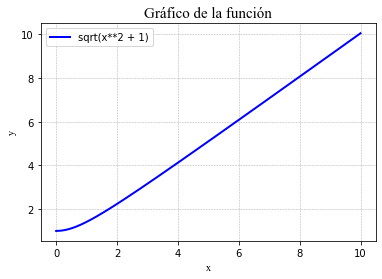

In [21]:
import time

def integrar():

    funcion = input('Escriba la integral que quiere solucionar: ')
    difer = input('Escriba la variable con respecto a la cual se integra: ')
    limite_inf = input('Ingrese límite inferior: ')
    limite_sup = input('Ingrese límite superior: ')

    result = sp.integrate(funcion, (difer, limite_inf, limite_sup))

    print('Función:', funcion, ', Diferencial:', difer, ', Límite Sup:', limite_inf, ', Límite Inf:', limite_sup)
    print('Resultado: ', result)
    
    return(funcion)


def derivar():

    funcion = input('Escriba la función que quiere derivar: ')
    deriv = input('Escriba la variable con respecto a la cual quiere derivar: ')

    result = sp.diff(funcion, deriv)

    print('Derivada de la función', funcion, ', respecto a:', deriv)
    print('Resultado: ', result)
    
    return(funcion)
    

def graficar_funcion():

    funcion = input('Escriba la función que quiere graficar en terminos de x: ')
    inicio = float(input('Escriba el intervalo inferior: '))
    fin = float(input('Escriba el intervalo superior: '))

    x_vals = np.linspace(inicio, fin, 400)

    x = sp.symbols('x')
    try:
        funcion = sp.sympify(funcion)
    except sp.SympifyError:
        print("Error: La función ingresada no es válida.")
        return

    y_vals = np.array([funcion.evalf(subs={x: val}) for val in x_vals])

    plt.plot(x_vals, y_vals, label=funcion, color='blue', linewidth=2)
    plt.title('Gráfico de la función', fontname = 'Times New Roman', fontsize = '15')
    plt.xlabel('x', fontname = 'Times New Roman')
    plt.ylabel('y', fontname = 'Times New Roman')
    plt.legend()
    plt.grid(linestyle = '--', linewidth = 0.5)
    plt.show()
    
    return(funcion)
    

# Entrada

entrada = input('Qué desea hacer: integrar, derivar o graficar: ')

if entrada == 'integrar':
    
    funcion = integrar()
    
elif entrada == 'derivar':
    
    funcion = derivar()

elif entrada == 'graficar':
    
    funcion = graficar_funcion()
    
else:
    raise ValueError('Entrada no válida. Ingrese las palabras "integrar", "derivar" o "graficar" de acuerdo con lo que desea realizar.')



# Historial de actividad

hora = time.strftime("%H:%M:%S")
fecha = time.strftime("%d/%m/%y")

registroOperaciones  = registroOperaciones.append({'Operacion_Realizada' : entrada, 'Funcion' : funcion, 'Fecha' : hora,
                                                  'Hora' : fecha}, ignore_index=True)

In [22]:
registroOperaciones.head()

,Operacion_Realizada,Funcion,Fecha,Hora
0,integrar,x**2+x**3,15:55:42,23/09/23
1,graficar,x**2 + 1,15:56:52,23/09/23
2,derivar,sqrt(x+1),16:05:06,23/09/23
3,graficar,None,16:09:38,23/09/23
4,graficar,sqrt(x**2 + 1),16:10:37,23/09/23
